##  This data set has the record of all the expenses incurred by the fifty Startups and the state where they operate. Objective of this task is to predict the profit made by a startup on the basis of expenses incurred and the state where they operate.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


In [2]:
df=pd.read_csv('50_Startups.csv')

## Performing some basic EDA to draw understanding  about the data

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.shape

(50, 5)

In [5]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [9]:
count= (df['R&D Spend']==0).sum()
print(count)

2


In [10]:
for i in ['R&D Spend','Marketing Spend']:
    print(i)
    print(df[i].value_counts()[0],)
    print(df[i].value_counts(normalize=True)[0],'\n')

R&D Spend
2
0.04 

Marketing Spend
3
0.06 



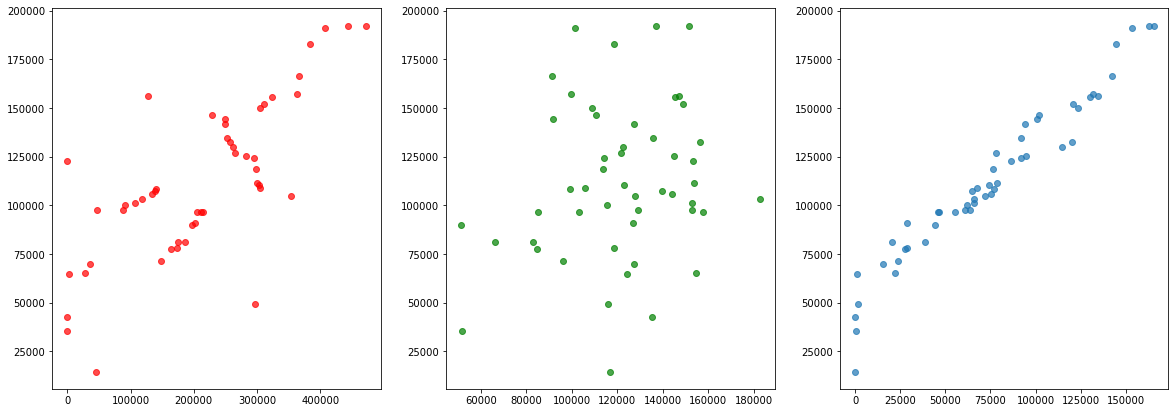

In [11]:
fig, ax = plt.subplots(1,3 , figsize = (20,7))

ax[0].scatter(df['Marketing Spend'] ,df['Profit'],color='red',alpha=0.7,)
ax[1].scatter(df['Administration'] ,df['Profit'],color='green',alpha=0.7)
ax[2].scatter(df['R&D Spend'] ,df['Profit'],alpha=0.7)


<AxesSubplot:xlabel='State', ylabel='Profit'>

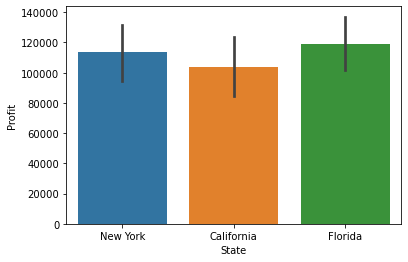

In [12]:
sns.barplot(x=df['State'],y=df['Profit'])

# Assumptions of Linear Regression

1.Linear Relation : The relationship b/w Dependent & Independent is supposed to be linear. Dependent varaibale is a linear function of independent variable & error term

2.Multicollinearity : Independence of the independent varaibles.
    
3.Errors [Residuals] are Normally Distributed i.e. Regression Model is Robust.

4.Homoscedasticity : Equal variance in the errors across dataset
    
The first two assumption needs to be checked before developing the model and the later two assumptions will be checked after fiting the model.

### 1. Linearity Assumption

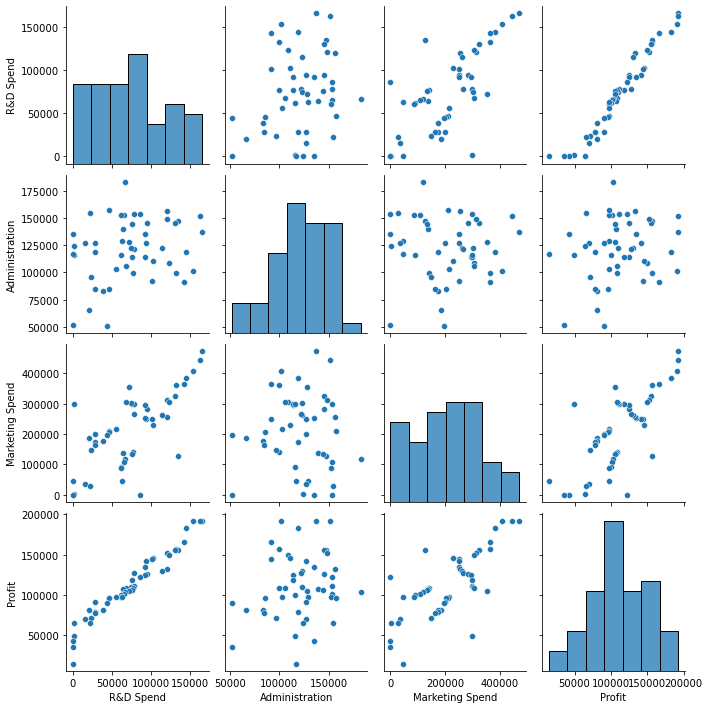

In [13]:
sns.pairplot(df)

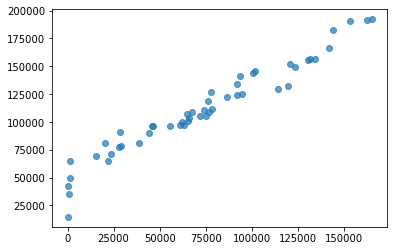

In [14]:
plt.scatter(df['R&D Spend'] ,df['Profit'],alpha=0.7)

### 2. Multicollinearity

In [15]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


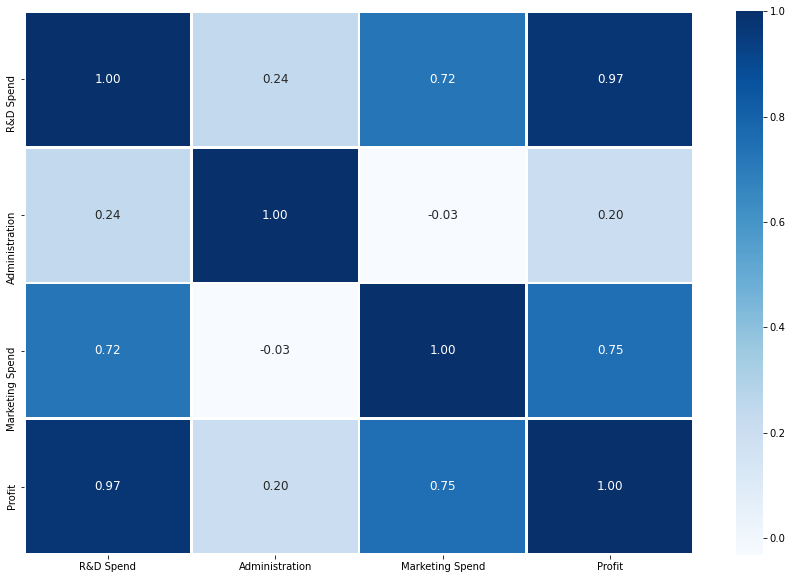

In [16]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), annot= True, annot_kws= {'size' : 12},
           cmap = 'Blues', fmt = '.2f', linewidths= 2)
plt.show();

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [18]:
x_data = df.drop(columns= ['State','Profit'])
x_data['Intercept'] = 1

In [19]:
VIF = pd.DataFrame()
VIF['Independent_Variables'] = x_data.columns
VIF['VIF'] = [vif(x_data.values, i) for i in range(x_data.shape[1])]
VIF = VIF.set_index('Independent_Variables').drop(index = 'Intercept')
VIF

,VIF
Independent_Variables,
R&D Spend,2.468903
Administration,1.175091
Marketing Spend,2.326773


### Developing the linear Model

In [20]:
df=pd.get_dummies(df,columns=['State'])

In [21]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [22]:
Y=df['Profit'].values

In [23]:
X=df.drop(['Profit'],axis=1).values

In [24]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [25]:
x_train.shape

(40, 6)

In [26]:
x_test.shape

(10, 6)

In [27]:
scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [28]:
x_train[:5]

array([[0.33561668, 0.48655174, 0.45494286, 0.        , 1.        ,
        0.        ],
       [0.2782839 , 0.3173015 , 0.43561799, 0.        , 0.        ,
        1.        ],
       [0.45557444, 0.87258866, 0.28413435, 0.        , 1.        ,
        0.        ],
       [0.2807759 , 1.        , 0.44680961, 1.        , 0.        ,
        0.        ],
       [0.55488118, 0.59103645, 0.62511553, 0.        , 1.        ,
        0.        ]])

In [29]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [30]:
lr.intercept_

44153.95466784858

In [31]:
lr.coef_

array([ 1.27892182e+05,  3.49927567e+03,  1.72720281e+04,  8.66383692e+01,
       -8.72645791e+02,  7.86007422e+02])

In [32]:
# Prediction after fiiting the model
y_train_pred=lr.predict(x_train)
y_train_pred[:5]

array([ 95764.42320496,  89164.62849777, 109506.72329085,  91366.2188941 ,
       127111.48666646])

In [33]:
y_train[:5]

array([ 96778.92,  96479.51, 105733.54,  96712.8 , 124266.9 ])

In [34]:
#Predicting the test set result
y_test_pred=lr.predict(x_test)
y_test_pred[:5]

array([103015.20159796, 132582.27760816, 132447.73845174,  71976.09851258,
       178537.48221055])

In [35]:
y_test[0:5]

array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39])

In [36]:
r2_score(y_train,y_train_pred)

0.9501847627493607

In [37]:
r2_score(y_test,y_test_pred)

0.9347068473282424

In [38]:
mean_squared_error(y_train,y_train_pred)

81571001.80077371

In [39]:
mean_squared_error(y_test,y_test_pred)

83502864.03257744

In [40]:
np.sqrt(mean_squared_error(y_train,y_train_pred))

9031.66661257897

In [41]:
np.sqrt(mean_squared_error(y_test,y_test_pred))

9137.990152794948

In [42]:
residual=y_train_pred-y_train

### 3. Normality of Errors

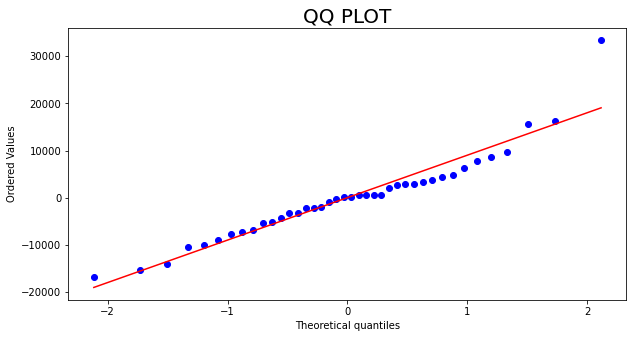

In [43]:
import scipy.stats as stats
plt.figure(figsize = (10,5))
stats.probplot(residual, dist='norm', plot = plt)
plt.title('QQ PLOT', size = 20)
plt.show();

### 4. Homoscedasticity

In [44]:
residual.sum()

1.3096723705530167e-10

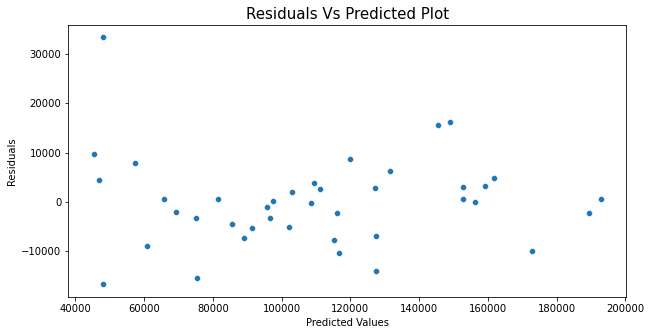

In [45]:
plt.figure(figsize = (10,5))
sns.scatterplot(x=y_train_pred ,y=residual)
plt.ylabel('Residuals')
plt.xlabel('Predicted Values')
plt.title('Residuals Vs Predicted Plot', size = 15)
plt.show()

All the assumption are checked and all the evaluation metrics are calculated.The best evaluation metric for this work is r2_score. R2 of 1 means the dependent variable can be predicted from the independent variable without any error. We get the r2_score as 0.95 that implies 95% variance in Y is predictable from X.